# Value at Risk (VaR) Comparison Tool

This notebook compares different methods of calculating Value at Risk (VaR) for a portfolio of stocks. We'll analyze the portfolio returns using three different approaches:
1. Historical VaR
2. Parametric (Normal) VaR
3. Monte Carlo VaR

Let's start by importing our libraries and loading the data.

## Calculating VaR using Different Methods

We'll now calculate the 1-day 95% VaR using three different methods.

## Interpretation of VaR Methods

### 1. Historical VaR
- **Method**: Uses actual historical returns and takes the 5th percentile
- **Assumptions**: Future returns will follow the same distribution as past returns
- **Pros**: Simple to understand, no distribution assumptions
- **Cons**: Limited by historical data, may not capture future market conditions

### 2. Parametric (Normal) VaR
- **Method**: Assumes returns follow a normal distribution, uses mean and standard deviation
- **Assumptions**: Returns are normally distributed
- **Pros**: Simple to calculate, widely used
- **Cons**: May underestimate risk if returns are not normally distributed

### 3. Monte Carlo VaR
- **Method**: Simulates thousands of possible return scenarios
- **Assumptions**: Returns follow a normal distribution (in this implementation)
- **Pros**: Flexible, can incorporate complex scenarios
- **Cons**: Computationally intensive, results depend on simulation parameters

## Bonus: 99% VaR Comparison

Let's also calculate the 99% VaR using the same methods for comparison.

### Comparison of 95% vs 99% VaR

The 99% VaR values are more extreme than the 95% VaR values, as they represent more extreme tail events. This means:
- 95% VaR: We expect losses to exceed this value 5% of the time
- 99% VaR: We expect losses to exceed this value only 1% of the time

The higher confidence level (99%) results in larger VaR values, indicating more conservative risk estimates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_theme(style='whitegrid', palette='husl')

In [3]:
# Load the portfolio returns data
returns_df = pd.read_csv('data/mock_portfolio_returns.csv')
portfolio_returns = returns_df['Portfolio']

# Display first few rows and basic statistics
print("First few rows of the data:")
display(returns_df.head())

print("\nBasic statistics of portfolio returns:")
display(portfolio_returns.describe())

First few rows of the data:


,AAPL,MSFT,TSLA,JPM,Portfolio
0,0.010434,-0.018513,0.033216,-0.008932,0.008899
1,-0.002265,0.014168,0.067630,-0.013217,0.021086
2,0.013454,0.032232,-0.048150,-0.009459,-0.021446
3,0.030961,0.015887,0.020504,0.010836,0.016378
4,-0.004183,-0.022391,-0.021972,-0.009194,-0.014515



Basic statistics of portfolio returns:


count    250.000000
mean       0.000218
std        0.014493
min       -0.041201
25%       -0.008800
50%        0.000044
75%        0.009264
max        0.037574
Name: Portfolio, dtype: float64

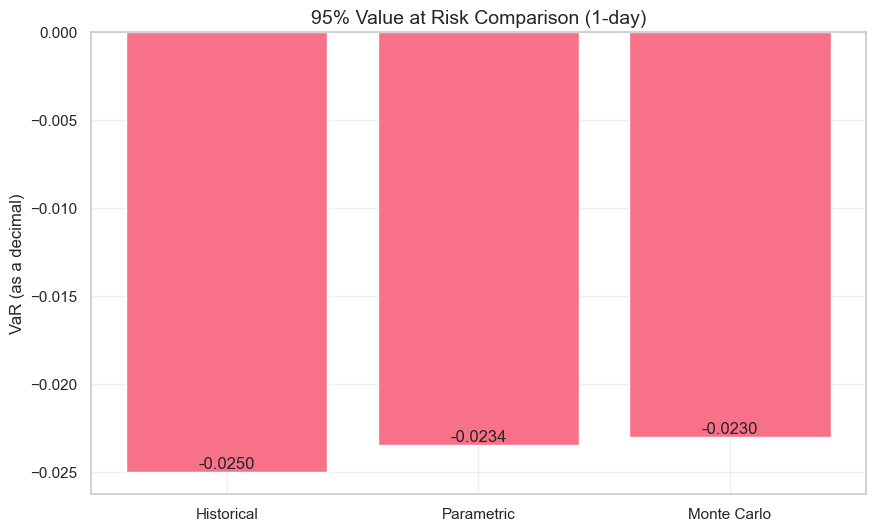

In [4]:
def calculate_var_95():
    # Historical VaR (5th percentile)
    historical_var = np.percentile(portfolio_returns, 5)
    
    # Parametric VaR (assuming normal distribution)
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    parametric_var = mean_return + std_return * np.percentile(np.random.standard_normal(10000), 5)
    
    # Monte Carlo VaR
    n_simulations = 10000
    mc_returns = np.random.normal(mean_return, std_return, n_simulations)
    mc_var = np.percentile(mc_returns, 5)
    
    return {
        'Historical': historical_var,
        'Parametric': parametric_var,
        'Monte Carlo': mc_var
    }

# Calculate VaR values
var_95 = calculate_var_95()

# Create bar plot
plt.figure(figsize=(10, 6))
methods = list(var_95.keys())
values = list(var_95.values())

bars = plt.bar(methods, values)
plt.title('95% Value at Risk Comparison (1-day)', fontsize=14)
plt.ylabel('VaR (as a decimal)', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()

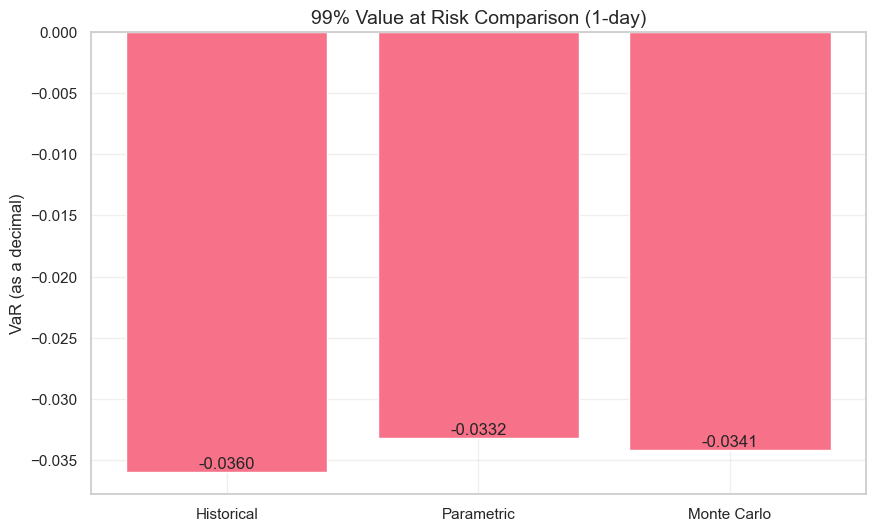

In [5]:
def calculate_var_99():
    # Historical VaR (1st percentile)
    historical_var = np.percentile(portfolio_returns, 1)
    
    # Parametric VaR (assuming normal distribution)
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    parametric_var = mean_return + std_return * np.percentile(np.random.standard_normal(10000), 1)
    
    # Monte Carlo VaR
    n_simulations = 10000
    mc_returns = np.random.normal(mean_return, std_return, n_simulations)
    mc_var = np.percentile(mc_returns, 1)
    
    return {
        'Historical': historical_var,
        'Parametric': parametric_var,
        'Monte Carlo': mc_var
    }

# Calculate VaR values
var_99 = calculate_var_99()

# Create bar plot
plt.figure(figsize=(10, 6))
methods = list(var_99.keys())
values = list(var_99.values())

bars = plt.bar(methods, values)
plt.title('99% Value at Risk Comparison (1-day)', fontsize=14)
plt.ylabel('VaR (as a decimal)', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()